Copyright &copy; Ajay Tech @ https://ajaytech.co

# Matplotlib

Basic 2-d plotting library for Data Science and Machine Learning.

## Table of Contents

- ### [Introduction](#Introduction)
 - #### [What is Matplotlib ](#What-is-Matplotlib)
 - #### [Why learn Matplotlib](#Why-learn-Matplotlib)
 - #### [Matplotlib Philosophy](#Matplotlib-Philosophy)
     - ##### [Plot in 2d](#Plot-in-2d)
     - ##### [Layers](#Layers)     
     - ##### [State Machine](#State-Machine)
 - #### [Our approach to Matplotlib](#Our-approach-to-Matplotlib)
- ### [Plot](#Plot)
 - #### [Axis](#Axis)
     - ##### [Axis Labels](#Axis-Labels)
     - ##### [Axis Range](#Axis-Range)
     - ##### [Axis Ticks](#Axis-Ticks)
 - #### [Plot Title](#Plot-Title)
 - #### [Grid](#Grid)
 - #### [Line Type](#Line-Type)
     - ##### [Format String Notation](#Format-String-Notation)
     - ##### [Format Keywords](#Format-Keywords)
 - #### [Legend](#Legend)
 - #### [Barplot](#Barplot)
- ### [Lifecycle of a Plot](#Lifecycle-of-a-plot)
- ### [Sub Plots](#Sub-Plots)
- ### [Axes](#Axes)
- ### [Scatter Plots](#Scatter-Plots)
- ### [Time Series Plots](#Time-Series-Plots)


## Introduction

Matplotlib is the most popular and credible plotting package in the Python Data Science world. Let's uncover the basics of Matplotlib

### What is Matplotlib

Say we have wage data ( age vs number of hours worked ) and we want to analyze if there is a relationship between them. This is just an extract from a larger dataset. We will see a more realistic dataset later.

In [3]:
import numpy as np
wage_data = np.genfromtxt("../data/age_vs_hours_small.csv",delimiter=",",skip_header=1,dtype=int)

In [4]:
import matplotlib.pyplot as plt

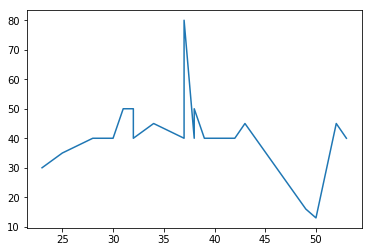

In [5]:
plt.plot(wage_data[:,0],wage_data[:,1])

Granted this is not all that informative, but this is a very small dataset. Let's increase the dataset size. 

In [25]:
wage_data = np.genfromtxt("../data/age_vs_hours_large.csv",delimiter=",",skip_header=1,dtype=int)

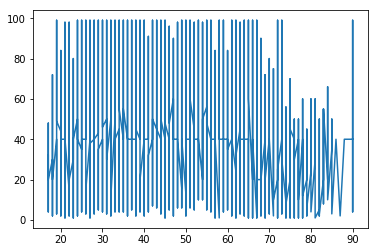

In [35]:
plt.plot(wage_data[:,0],wage_data[:,1])

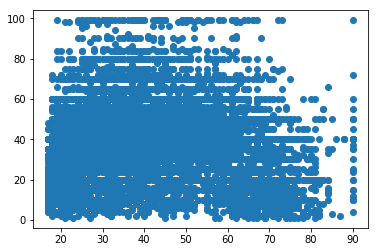

In [31]:
plt.scatter(wage_data[:,0],wage_data[:,1])

Plot is too dense. Let's see if we can reduce the opacity a bit.

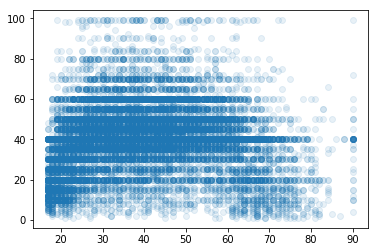

In [32]:
plt.scatter(wage_data[:,0],wage_data[:,1],alpha=0.1)

Also, for the viewer to understand the data being represented in this plot, let's put some labels. 

Text(0.5, 1.0, 'Age vs Number of hours worked')

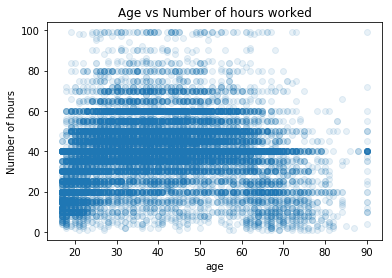

In [38]:
plt.scatter(wage_data[:,0],wage_data[:,1],alpha=0.1)
plt.xlabel("age")
plt.ylabel("Number of hours")
plt.title("Age vs Number of hours worked")

Don't worry if you don't understand the syntax of what you saw. The point we are trying to make is, matplotlib is a full-fledged 2-d plotting toolkit that let's you plot most types of data with good control on each aspect of the plotting element - like, shape,size,color,opacity, labels etc. There is also a wide variety of plots to choose from - scatter plot, line plot, histogram, time series plots and many more. Later, we will learn about the most used controls in matplotlib with examples. 

### Why learn Matplotlib

The conclusions you can draw from the picture below, is something you can never draw from the raw numbers themselves.

Text(0.5, 1.0, 'Age vs Number of hours worked')

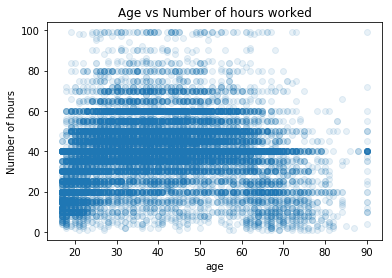

In [39]:
plt.scatter(wage_data[:,0],wage_data[:,1],alpha=0.1)
plt.xlabel("age")
plt.ylabel("Number of hours")
plt.title("Age vs Number of hours worked")

That is the power of visualization. Every Data Scientist and ML engineer needs visualization to **_Understand_** their data. By **Understand** we mean, 
- understanding data trends
- identify outliers
- identify patters etc

Once we **Understand** the data, we have to let our audience understand the results of our analysis. For example, unless you should a picture like the one shown above, how do you convince your audience about your analysis. Visualization is a keypart of communicating your test results. 

Although there are dedicated software packages ( Tableau, Power BI ) and some other open source tools (, d3.js, plot.ly ) , if you are invested into the Python environment for Data Science of ML, Matplotlib is a wonderful visualization tool. The strength of Matplotlib lies in it's customization. Also, Matplotlib is the basis for another high level visualization library called Seaborn.

### Matplotlib Philosophy

Matplotlib is modeled functionally after MATLAB. Most of the design philisophy seems to revolve around the same way MATLAB does plotting.

#### Plot in 2d

Although Matplotlib can do a bit of 3d, most visualization still in the data science world is 2d. However, real world data is rarely 2d. For example, if you look at the Canada Wage data above, there were 2 parameters
- Age
- Number of hours. 

This is 2-dimensional data. What if you added one more parameter - sex. Now you want to analyze the number of hours worked not just by age, but by sex as well. 

In [98]:
wage_data = pd.read_csv("../data/age_vs_hours_vs_sex.csv",delimiter=",",
                        header=0)
wage_data.head()

,age,sex,hours-per-week
0,39,Male,40
1,50,Male,13
2,38,Male,40
3,53,Male,40
4,28,Female,40


How do we plot 3 variables ( dimensions ) on 2d ? There are a variety of ways to do it. One of them being **_sub-plots_**. 

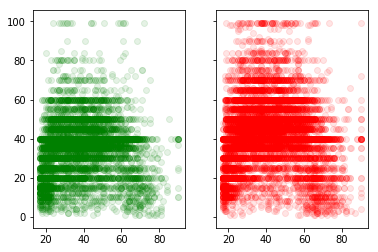

In [110]:
import matplotlib.cm as cm

# wage_data["sex"] == "Male"
wage_data["sex"] = wage_data["sex"].astype("str")
wage_data["sex"] = wage_data["sex"].astype("category")
# wage_data["sex"] == "Male"
wage_data_male     = wage_data[wage_data["sex"] == "Male"] 
wage_data_female   = wage_data[wage_data["sex"] == "Female"] 

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(wage_data_female["age"],wage_data_female["hours-per-week"],alpha=0.1,c= "g")
ax2.scatter(wage_data_male["age"],wage_data_male["hours-per-week"],alpha=0.1,c= "r")

#### State Machine

This is another feature that is straight out of the MATLAB plotting technique. pyplot object acts like a static state machine. It has a hierarchical structure whereby you keep adding elements to the parent "pyplot" static object. Let's see some examples to understand this better. 

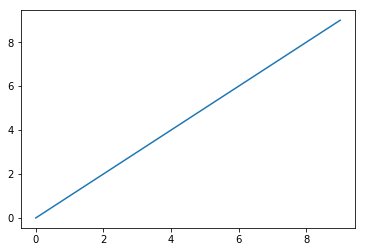

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(10)
y = x

plt.plot(x,y)

Now that we have the basic plot, let's add more on top of it - like juxtaposing a curve in different color on top of the same straight line plot.

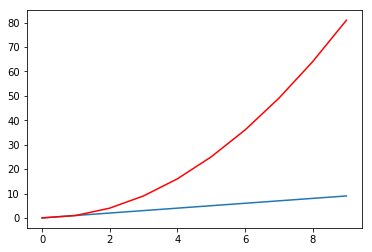

In [14]:
x = np.arange(10)
y = x
z = x**2
plt.plot(x,y)
plt.plot(x,z,c="r")

The first call to pyplot ( plt.plot(x,y) ) creates the plot object and all subsequent calls adds more elements to the same plot object. Since all the subsequent functions on plt are acting on the same pyplot object, they share the same axis, axis labels, legend, plot labels and so on. Let's see some more examples below. 

Let's add a legend to make things clear to the viewer. 

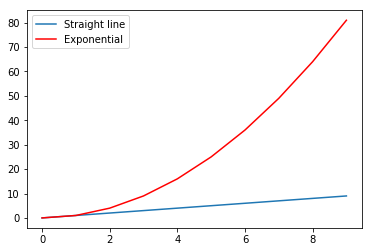

In [11]:

plt.plot(x,y, label = "Straight line")
plt.plot(x,z,c="r", label = "Exponential")
plt.legend(loc='upper left')

Let's show some points on the screen - may be to draw attention to some of the important data points on the plot.

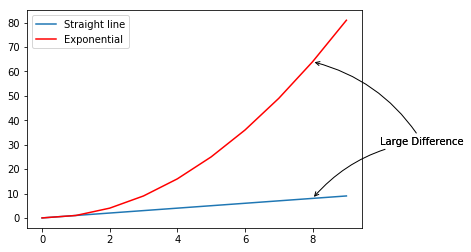

In [26]:
x = np.arange(10)
y = x
z = x**2
plt.plot(x,y, label = "Straight line")
plt.annotate ( "Large Difference", xy=(8,8),
              xytext=(+10, +30),arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.plot(x,z,c="r", label = "Exponential")
plt.annotate ( "Large Difference", xy=(8,8**2),
              xytext=(+10, +30),arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.legend(loc='upper left')


We will learn more about this as we go forward. 

#### Layers

To make plotting multiple elements on a 2-d surface, we tend to use different element like
- Color
- Shape
- Size etc. 

To make this process easy, Matplotlib allows us to add the different elements in a layered fashion - one layer on top of another. Let's see an example. 

Say, we fill the area under the curve with a color and then pile another element on top of the same plot. The order of piling matters. We ofcourse have fine control over this using zorder.

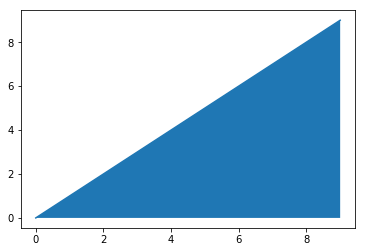

In [36]:
x = np.arange(10)
y = x

plt.plot(x,y)
plt.fill_between(x,y)

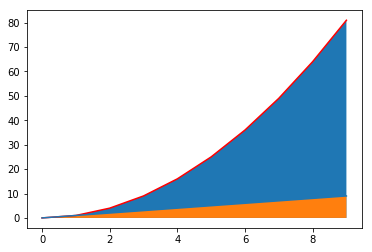

In [35]:
plt.plot(x,z,c="r")
plt.fill_between(x,z)
plt.plot(x,y)
plt.fill_between(x,y)

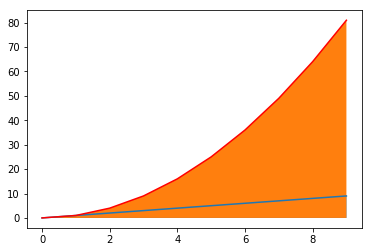

In [34]:
plt.plot(x,y)
plt.fill_between(x,y)
plt.plot(x,z,c="r")
plt.fill_between(x,z)

### Our approach to Matplotlib

Unless we understand the basics of probability and statistics, we can't understand much about what these plots and graphs mean. So, we will postpone most of the advanced topics in Matplotlib to later sections. In this chapter, we will just focus on the basics of Matplotlib.

## Plot

The generic object for plotting is matplotlib.pyplot or **_pyplot_** if you exclude the package name. There are some basic elements in every plot. 

### Axis

Typically, every 2-d plot has 2 axes (although there can be more dimensions some times). 

- x axis
- y axis

Each axis can a label. You can do that using xlabel and ylabel.

#### Axis Labels

Text(0, 0.5, 'Salary')

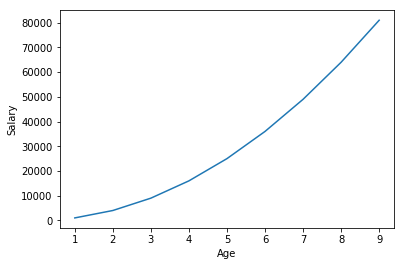

In [44]:
x = np.arange(1,10)
y = x**2 * 1000

plt.plot(x,y)
plt.xlabel("Age")
plt.ylabel("Salary")


#### Axis Range

You might just want to show a certain range of the axis. You can zoom in on a certain section by specifying the axis ( ) function. The syntax for it is

In [50]:
# axis ( xMin, xMax, yMin, yMax )

[1, 5, 0, 30000]

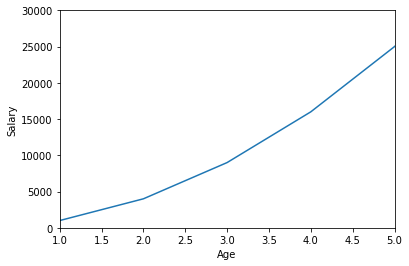

In [48]:
plt.plot(x,y)
plt.xlabel("Age")
plt.ylabel("Salary")

plt.axis([1,5,0,30000])

#### Axis Ticks

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
<a list of 11 Text xticklabel objects>


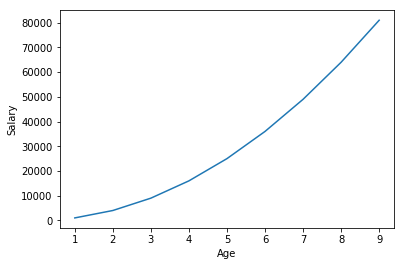

In [68]:
plt.plot(x,y)
plt.xlabel("Age")
plt.ylabel("Salary")
locs,labels = plt.xticks()
print(locs) ; print(labels)

([<matplotlib.axis.XTick at 0xd643ef0>,
 <a list of 11 Text xticklabel objects>)

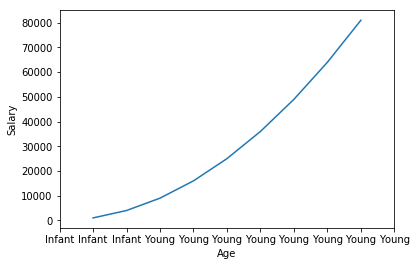

In [67]:
plt.plot(x,y)
plt.xlabel("Age")
plt.ylabel("Salary")
locs,labels = plt.xticks()
labels = ["Infant","Infant","Infant","Young","Young",'Young',"Young","Young","Young",'Young',"Young"]
plt.xticks(locs,labels)

### Plot Title

This is where you describe the plot in words.

Text(0.5, 1.0, 'Age vs Salary')

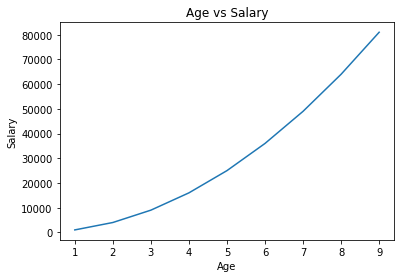

In [69]:
plt.plot(x,y)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary")

Granted, this is a trivial description - however, you can customize it anyway you want depending on the requirement.

Text(0.0, 1.0, 'Age vs Salary')

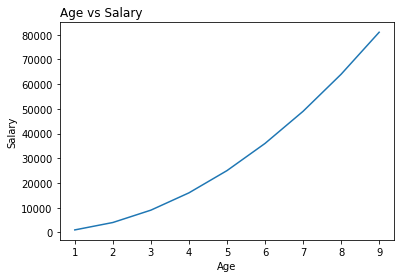

In [70]:
plt.plot(x,y)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary", loc="left")

Or you can have multiple titles

Text(0.5, 1.0, 'Salary vs Age')

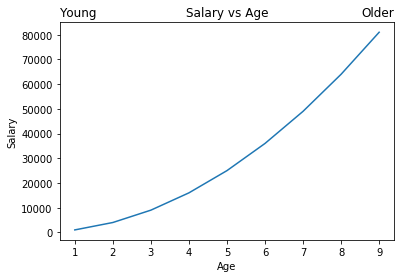

In [75]:
plt.plot(x,y)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Young", loc="left")
plt.title("Older", loc="right")
plt.title("Salary vs Age")

With different fonts and sizes

Text(0.5, 1.0, 'Salary vs Age')

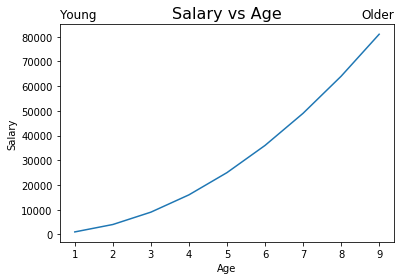

In [76]:
plt.plot(x,y)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Young", loc="left")
plt.title("Older", loc="right")
plt.title("Salary vs Age", fontsize=16)

Text(0.5, 1.0, 'Salary vs Age')

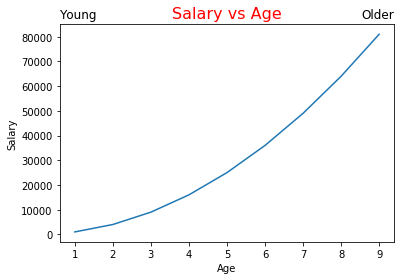

In [78]:
plt.plot(x,y)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Young", loc="left")
plt.title("Older", loc="right")
plt.title("Salary vs Age", fontsize=16,color="red")

Or using a font dictionary object

Text(0.5, 1.0, 'Salary vs Age')

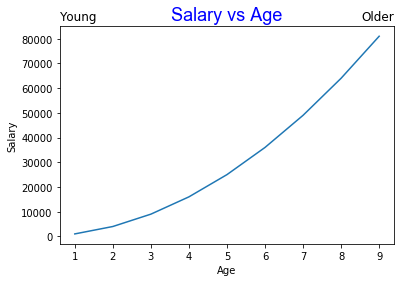

In [80]:
font = {'family': 'arial',
        'color':  'blue',
        'weight': 'normal',
        'size': 18,
        }

plt.plot(x,y)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Young", loc="left")
plt.title("Older", loc="right")
plt.title("Salary vs Age", fontdict = font)

### Grid

To correlate x and y values accurately, it is some times better to have a grid. 

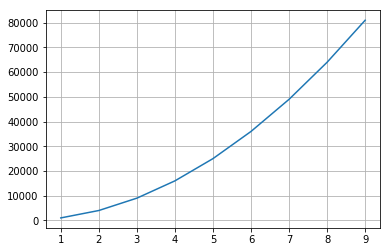

In [81]:
plt.plot(x,y)
plt.grid()

The default grid color and transparency should be good enough for most situations. As usual though, you can customize it to your liking.

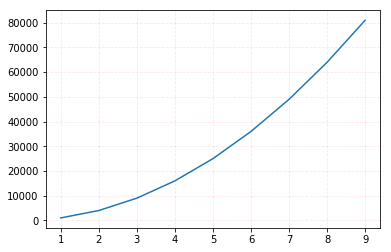

In [88]:
plt.plot(x,y)

plt.grid(color="red", alpha=0.1,linestyle="--")

As you can see this is a more subdued version of the one above (although it is in red). You can pretty much use any property that a line can have, 
- style
- color
- alpha ( transparency )
- width etc

### Line Type

The typical line is blue, but you have fine grained control over the plotting of the line, like
- color
- type
- point type
- size 
- alpha ( transparency ) etc

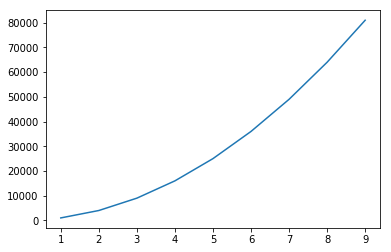

In [89]:
plt.plot(x,y)

#### Format String Notation

Instead of specifying all of the properties separately, matplotlib has a short string-based notation to specify most of the line properties.

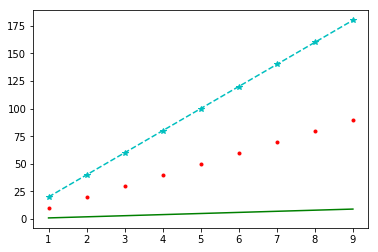

In [103]:
x = np.arange(1,10)
y1 = x
y2 = x*10
y3 = x*20
#---------------------------------------------
plt.plot(x,y1,"g")      # Make the line green
plt.plot(x,y2,"r.")     # Make the line red, with dots for the points
plt.plot(x,y3,"c*--")    # Make the line cyan with a dashed line

The format string goes something like this

> plot ( x, y , fmt = " [color] [marker] [line type] " ) 

Just google _matplotlib format string_ for more details on the different values that are possible for these parameters.

#### Format Keywords

Instead of using the format string, you can use specific keywords to specify the line format. 

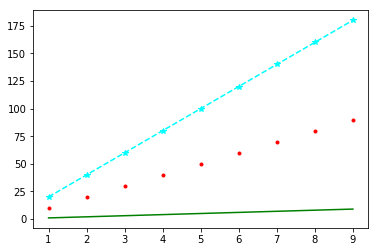

In [108]:
plt.plot(x,y1,color="green")      # Make the line green
plt.plot(x,y2,color="red",linestyle="none",marker=".")     # Make the line red, with dots for the points
plt.plot(x,y3,color="cyan", linestyle="dashed", marker="*")    # Make the line cyan with a dashed line

### Legend

In case there are multiple plotting elements on the same plot, **_Legend_** helps us understand what each of the stand for.

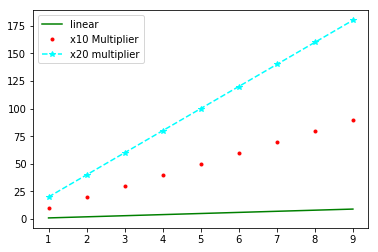

In [109]:
plt.plot(x,y1,color="green", label="linear")
plt.plot(x,y2,color="red",linestyle="none",marker=".", label="x10 Multiplier")  
plt.plot(x,y3,color="cyan", linestyle="dashed", marker="*",label="x20 multiplier")

plt.legend()


You can locate the _Legend_ at a particular location or let Matplotlib choose a best fit. 

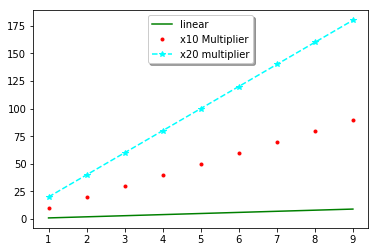

In [117]:
p1 = plt.plot(x,y1,color="green", label="linear")
p2 = plt.plot(x,y2,color="red",linestyle="none",marker=".", label="x10 Multiplier")  
p3 = plt.plot(x,y3,color="cyan", linestyle="dashed", marker="*",label="x20 multiplier")

legend = plt.legend(loc="upper center",shadow=True)


You can even have a drop shadow and change the color of the legend to make it more or less prominent. 

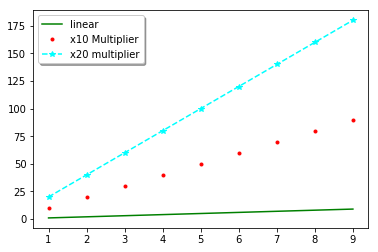

In [119]:
p1 = plt.plot(x,y1,color="green", label="linear")
p2 = plt.plot(x,y2,color="red",linestyle="none",marker=".", label="x10 Multiplier")  
p3 = plt.plot(x,y3,color="cyan", linestyle="dashed", marker="*",label="x20 multiplier")

plt.legend(loc="best",shadow=True)

## Barplot

In simple terms, a bar plot visually compares multiple categories. For example, compare the weight of 5 students in a class.

<BarContainer object of 3 artists>

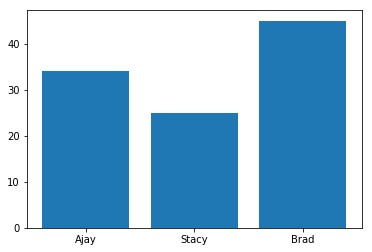

In [3]:
import matplotlib.pyplot as plt

names  = ["Ajay","Stacy","Brad"]
weight = [34,25,45]

plt.bar(names,weight)

You can tilt it horizontally if you want. You might have seen this in comparing Processor speeds in tech magazines. 

<BarContainer object of 3 artists>

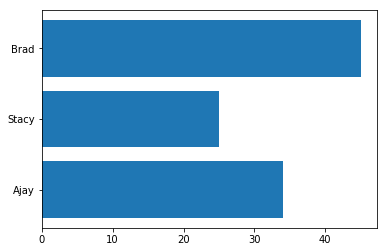

In [10]:
plt.barh(names,weight)

Say you want to specifically call out a particular bar - say in this case as Brad being overweight, you can do that using the color attribute

<BarContainer object of 3 artists>

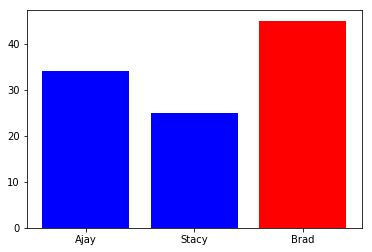

In [11]:
plt.bar(names,weight,color=["blue","blue","red"])

Or using a horizontal line to speicify a cut-off. 

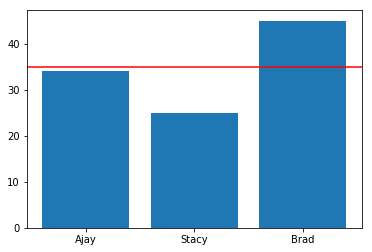

In [15]:
plt.bar(names,weight)
plt.axhline(35,color="red")

Sometimes, you can compare multiple attributes for the same category. For example, in the same data above, say, we are comparing the weight against the corresponding average weight categorized by sex. 

In [ ]:
Or using

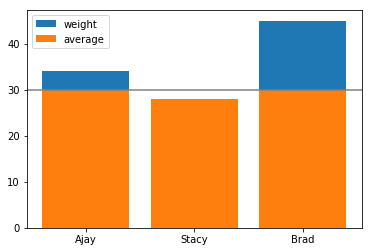

In [13]:
names      = ["Ajay","Stacy","Brad"]
weight     = [34,25,45]

#---------------------------
weight_avg = [30,28,30]
plt.bar(names,weight,label="weight")
plt.bar(names,weight_avg,label="average")
plt.axhline(30, color="gray")
plt.legend()

This is not all that useful, right ? The trick is to move the bars' x position a bit to the right so that they appear side-by-side. 

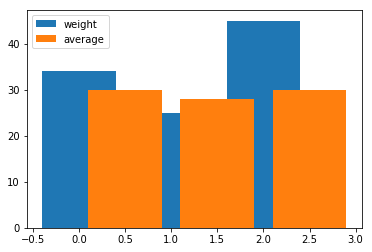

In [24]:
import numpy as np
names      = ["Ajay","Stacy","Brad"]
weight     = [34,25,45]
weight_avg = [30,28,30]

#---------------------------
x = np.arange(len(names))   # Creates x-axis numbers
w = 0.5
plt.bar(x,weight,label="weight")
plt.bar(x+w,weight_avg,label="average")
plt.legend()

Still not very useful, right ? What if we adjust the width of the bar ? Use the **_width_** attribute. You might have to tweak the width a bit based on the outcome. 

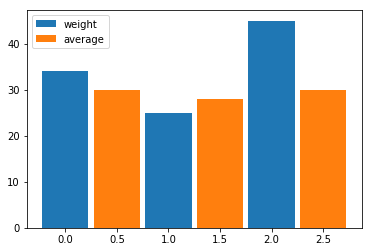

In [26]:
plt.bar(x,weight,label="weight",width=0.45)
plt.bar(x+w,weight_avg,label="average",width=0.45)
plt.legend()

How about the labels then ? Create custom labels using xticks. 

([<matplotlib.axis.XTick at 0xc4c0670>,
 <a list of 6 Text xticklabel objects>)

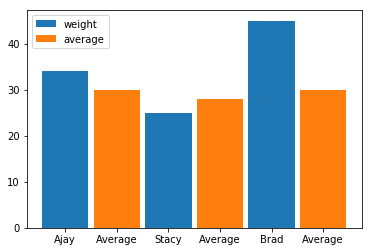

In [35]:
plt.bar(x,weight,label="weight",width=0.45)
plt.bar(x+w,weight_avg,label="average",width=0.45)
plt.legend()
#----------------------------------------------------
x_labels = np.append(x,x+w)  # Create label values
x_labels = np.sort(x_labels) 
labels = ["Ajay","Average","Stacy","Average","Brad","Average"] # Create actual labels
plt.xticks(x_labels,labels)  # Set the labels as x ticks

## Lifecycle of a Plot

Matplotlib has 2 interfaces. 
- MATLAB based interface ( State-based )
- Object Oriented interface

So far, we have seen the first one - completely based on **pyplot** module. How about the second ? 

To understand the object oriented interface of Matplotlib, we have to start with a couple of fundamental concepts related to a plot. 

- Figure
- Axes

Think of the entire plot as an object hierarchy with **Figure** at the top of it. Here is a small subset of the hierarchy with _Figure_ being at the top, followed by _Axes_ ( not the same as axis ), followed by different texts on the plot, different kinds of plots it can handle, the different _axis_ and so on. The hierarchy doesn't stop there. Further to x-axis for example, there are ticks and further to ticks there are its subsequent properties and so on.

<img src="./pics/matplotlib-object-oriented-hierarchy.png" />

Here is another picture from Matplotlib documentation that shows the same pictorially. Essentially, the same things as above, put visually on the plot to make understanding it even better. 

<img src="./pics/matplotlib-plot-anatomy.png"/>

This is a lot to understand. So, for starters, let's just look at the picture below. 

<img src="./pics/matplotlib-relationship-hierarchy.png"/>

Let's explore this in code. 

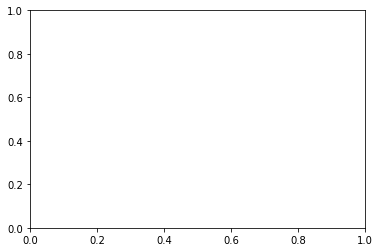

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(10)
y = x**2

fig,ax = plt.subplots(1,1)  # 1,1 indicates, 1 row and 1 column. We will see more examples 

This is a blank plot. Let's add it's components step by step.

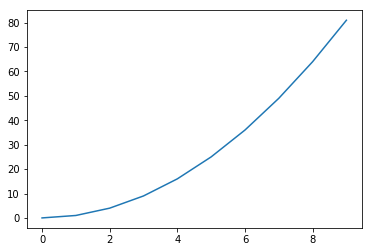

In [22]:
# Use the plot function
fig,ax = plt.subplots(1,1)
ax.plot(x,y)

Text(0.5, 1.0, 'Exponential Plot')

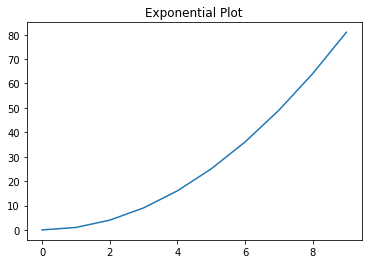

In [25]:
fig,ax = plt.subplots(1,1) 
ax.plot(x,y)

#------ Set title -------------------#
ax.set_title("Exponential Plot")

Text(0, 0.5, 'Cell growth')

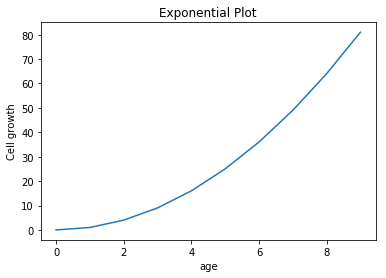

In [26]:
fig,ax = plt.subplots(1,1) 
ax.plot(x,y)
ax.set_title("Exponential Plot")

#--------------Set the x and y axis labels ----------------
ax.set_xlabel("age")
ax.set_ylabel("Cell growth")

Say for example, you have 2 sets of data and you want to compare them side by side. One way, is to overlap both on the same plot.

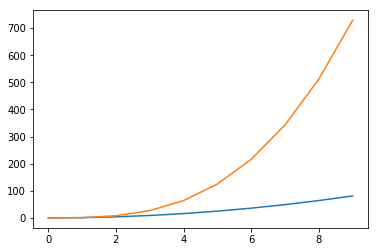

In [28]:
x = np.arange(10)
y1 = x**2
fig,ax = plt.subplots(1,1) 

#----------- new y-axis data ---------------
y2 = x**3
ax.plot(x,y1)
ax.plot(x,y2)

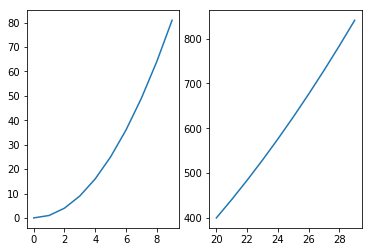

In [31]:
x1 = np.arange(10)
y1 = x1**2
fig,ax = plt.subplots(1,2) 

#----------- new y-axis data ---------------
x2 = np.arange(20,30)
y2 = x2**2
ax[0].plot(x1,y1)
ax[1].plot(x2,y2)

## Sub Plots